In [53]:
import yfinance as yf
import pandas as pd
import numpy as np

In [6]:
sp500 = yf.Ticker("^GSPC")

In [7]:
sp500 = sp500.history(period="max")

In [39]:
min_range = sp500.index >= '1990-01-01 00:00:00-05:00'
max_range = sp500.index <= '2022-05-18 00:00:00-05:00' 
sp500 = sp500[max_range & min_range].copy()
sp500.index

DatetimeIndex(['1990-01-02 00:00:00-05:00', '1990-01-03 00:00:00-05:00',
               '1990-01-04 00:00:00-05:00', '1990-01-05 00:00:00-05:00',
               '1990-01-08 00:00:00-05:00', '1990-01-09 00:00:00-05:00',
               '1990-01-10 00:00:00-05:00', '1990-01-11 00:00:00-05:00',
               '1990-01-12 00:00:00-05:00', '1990-01-15 00:00:00-05:00',
               ...
               '2022-05-05 00:00:00-04:00', '2022-05-06 00:00:00-04:00',
               '2022-05-09 00:00:00-04:00', '2022-05-10 00:00:00-04:00',
               '2022-05-11 00:00:00-04:00', '2022-05-12 00:00:00-04:00',
               '2022-05-13 00:00:00-04:00', '2022-05-16 00:00:00-04:00',
               '2022-05-17 00:00:00-04:00', '2022-05-18 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=8159, freq=None)

<Axes: xlabel='Date'>

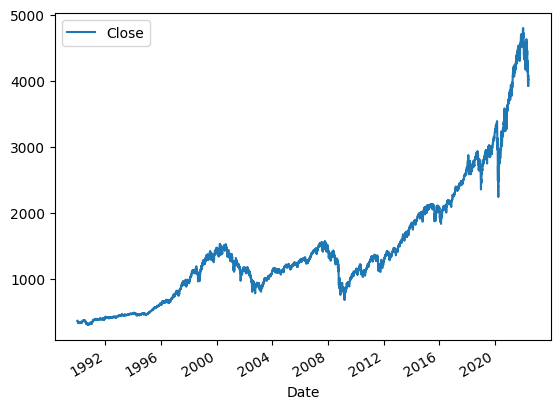

In [40]:
sp500.plot.line(y="Close",use_index=True)

In [41]:
# del sp500["Dividends"]
# del sp500["Stock Splits"]
sp500.shape

(8159, 7)

In [42]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,False
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,False
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,False
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,True
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,False
...,...,...,...,...,...,...,...
2022-05-12 00:00:00-04:00,3903.949951,3964.800049,3858.870117,3930.080078,6286450000,4023.889893,True
2022-05-13 00:00:00-04:00,3963.899902,4038.879883,3963.899902,4023.889893,5183340000,4008.010010,False
2022-05-16 00:00:00-04:00,4013.020020,4046.459961,3983.989990,4008.010010,4415030000,4088.850098,True


In [43]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]) 
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,False
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,False
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,False
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,True
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,False
...,...,...,...,...,...,...,...
2022-05-12 00:00:00-04:00,3903.949951,3964.800049,3858.870117,3930.080078,6286450000,4023.889893,True
2022-05-13 00:00:00-04:00,3963.899902,4038.879883,3963.899902,4023.889893,5183340000,4008.010010,False
2022-05-16 00:00:00-04:00,4013.020020,4046.459961,3983.989990,4008.010010,4415030000,4088.850098,True


In [47]:
from sklearn.ensemble import RandomForestClassifier

## n_estimators & min_samples_split
model = RandomForestClassifier(n_estimators =100, min_samples_split=100, random_state=1)

## spliting method
train = sp500.iloc[:-100] ## 0 to last-100
test = sp500.iloc[-100:## last 100

## beauty of seleting feature
predictors = ["Close","Volume","Open","High","Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [50]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [70]:
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)


0.42696629213483145

In [68]:
combined = pd.concat([test["Target"], preds], axis = 1).astype('uint8') ##turn boolean into 0, 1

<Axes: xlabel='Date'>

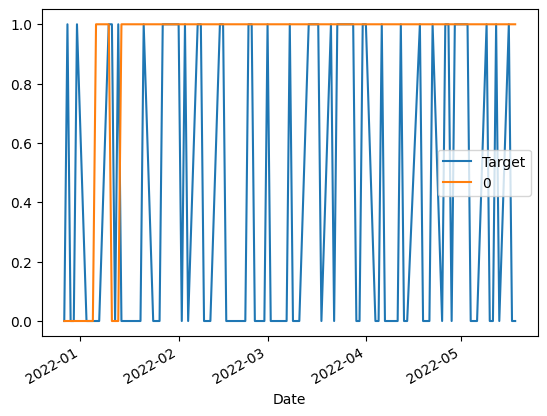

In [67]:
combined.plot()

In [94]:
## Backtesting system

def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"],preds], axis=1)
    return combined


In [97]:
def backtest(data, model, predictor, start=2500, step=250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy() ## 0 to i [0:start], [0:start+250]
        test = data.iloc[i:(i+step)].copy() # i to i+250 [start:start+250], [start+250, start+250+250]
        predictions = predict(train, test, predictor, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [107]:
predictions = backtest(sp500, model, predictors)

In [108]:
predictions["Predictions"].value_counts()

Predictions
False    3360
True     2299
Name: count, dtype: int64

In [109]:
precision_score(predictions["Target"], predictions["Predictions"])

0.535450195737277

In [110]:
predictions["Target"].value_counts()/ predctions.shape[0]

Target
True     0.536844
False    0.463156
Name: count, dtype: float64

In [116]:
horizons = [2,5,60,250,1000] ##compare if price higer than last 2 days, last trading week, last 2 months, last year, last 4 years
new_predictors = []


## algorithms
for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    ratio_column = f"close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"]/ rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

In [133]:
sp500 = sp500.dropna()

In [140]:
model = RandomForestClassifier(n_estimators =200, min_samples_split=50, random_state=1)

def predict(train, test, predictors, model):
    # Print summaries of the train and test data
#     print("Train data summary:")
#     print(train[predictors].describe())
#     print("Any NaN in train:", train[predictors].isna().any())
#     print("Any Inf in train:", np.isinf(train[predictors]).any())

#     print("\nTest data summary:")
#     print(test[predictors].describe())
#     print("Any NaN in test:", test[predictors].isna().any())
#     print("Any Inf in test:", np.isinf(test[predictors]).any())

    # Fitting the model
#     try:
#         model.fit(train[predictors], train["Target"])
#     except ValueError as e:
#         print("Error during model fitting:", e)
#         return None

#     # Predicting
#     try:
#         preds = model.predict(test[predictors])[:,1]
#     except IndexError as e:
#         print("Error during prediction:", e)
#         return None
    
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"],preds], axis=1)
    return combined

In [141]:
predictions = backtest(sp500, model, new_predictors)

In [142]:
predictions["Predictions"].value_counts()

Predictions
0.0    3865
1.0     793
Name: count, dtype: int64

In [143]:
## overnight exchange
## high resolution
## https://www.youtube.com/watch?v=1O_BenficgE